## import libraries 

In [1]:
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# read shape file
eu_shape_file = "../input_data/EuropeBoundary.shp"
gdf = gpd.read_file(eu_shape_file)
bbox = gdf.total_bounds
bbox

array([-31.28903052,  34.93055094,  68.93136141,  81.85192337])

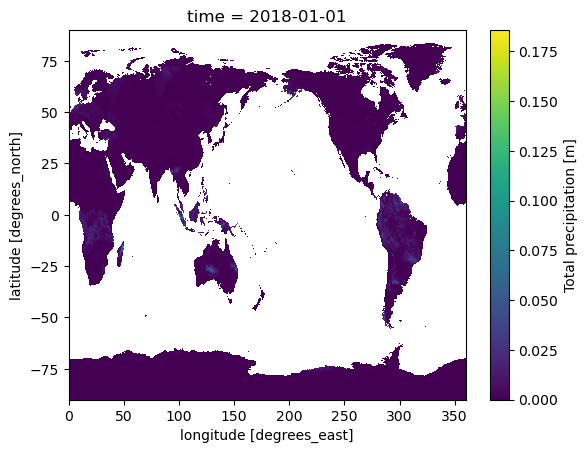

In [3]:
# open era5_land
data_name = "../data/era5-land_total_precipitation_2018-01.nc"
era5_land_data = xr.open_dataset(data_name)
era5_land_data
era5_land_data.tp.isel(time=0).plot()

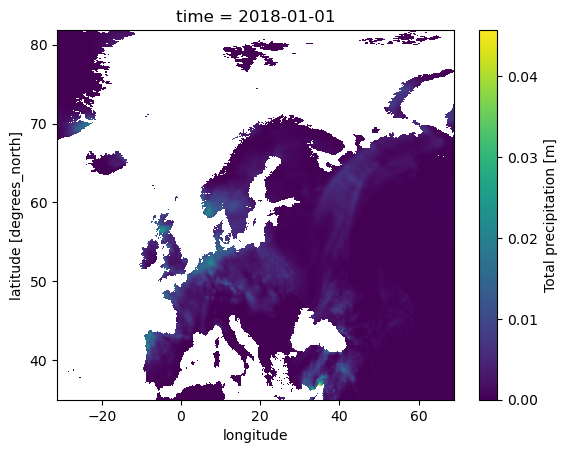

In [4]:
# Convert the longitude coordinates from [0, 360] to [-180, 180]
ds = era5_land_data.assign_coords(longitude=(((era5_land_data.longitude + 180) % 360) - 180))

# Sort the Dataset 
ds = ds.sortby(['longitude', 'latitude'])

# Cut the dataset
masked_ds = ds.sel(longitude=slice(bbox[0], bbox[2]), latitude=slice(bbox[1], bbox[3]))
masked_ds.tp.isel(time=0).plot()

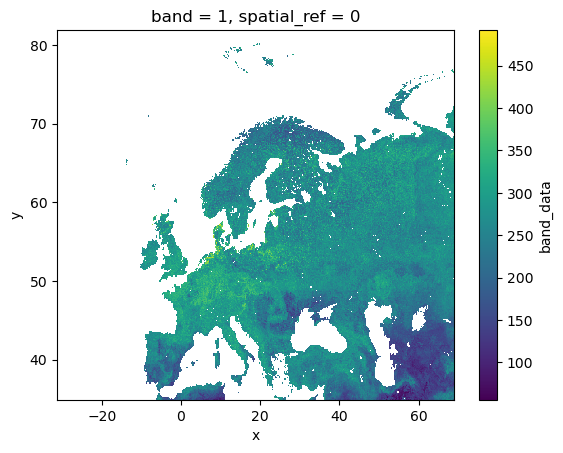

In [5]:
# open ssm
data_name = "../data/GlobalGSSM11km2018_20240214.tif"
ssm_data = xr.open_dataset(data_name)
ssm_data

ds = ssm_data.sortby(['x', 'y'])
masked_ds = ds.sel(x=slice(bbox[0], bbox[2]), y=slice(bbox[1], bbox[3]))
masked_ds["band_data"].isel(band=0).plot()